In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import load_img

In [3]:
path = "/home/MERHAWI/downloads/fashion_zm/train/t-shirt"
name = "a4ff0158-4981-43d5-aed5-6898e5c1bfb2.jpg"
full_name = f'{path}/{name}'

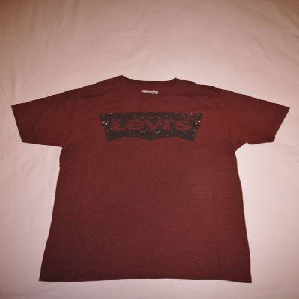

In [4]:
img = load_img(full_name, target_size=(299,299))
img 

In [5]:
x = np.array(img)
x.shape

(299, 299, 3)

In [6]:
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.applications.xception import decode_predictions

model = Xception(weights='imagenet', input_shape=(299,299,3))

X = np.array([x])

X.shape

X = preprocess_input(X)

pred = model.predict(X)

pred.shape

decode_predictions(pred)



2024-10-29 07:25:00.326094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-29 07:25:00.334414: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


1/1 [==============================] - 1s 1s/step


[[('n03595614', 'jersey', 0.9600709),
  ('n04370456', 'sweatshirt', 0.009093896),
  ('n04599235', 'wool', 0.004770073),
  ('n03710637', 'maillot', 0.0008776034),
  ('n04532106', 'vestment', 0.0007721198)]]

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory('./train', 
                                         target_size=(150,150), 
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [9]:
valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_ds = valid_gen.flow_from_directory('./validation', 
                                         target_size=(150,150), 
                                         batch_size=32, shuffle=False)

Found 341 images belonging to 10 classes.


In [10]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [11]:
x,y = next(train_ds)

In [12]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3),
)

base_model.trainable = False

In [13]:
#Functional Style
inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training =False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [14]:
preds = model.predict(x)

1/1 [==============================] - 3s 3s/step


In [15]:
preds[0]

array([-1.1131382 ,  0.0605596 , -0.8652376 , -0.98426664, -0.23221168,
        0.6126402 , -1.0676775 ,  0.18732214, -1.9085538 ,  0.39050257],
      dtype=float32)

In [ ]:
learning_rate = 0.001
optimizer = keras.optimizers.Adamax(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])



Epoch 1/10
96/96 [==============================] - 206s 2s/step - loss: 1.3219 - accuracy: 0.5684 - val_loss: 0.9477 - val_accuracy: 0.7038
Epoch 2/10
96/96 [==============================] - 202s 2s/step - loss: 0.8491 - accuracy: 0.7285 - val_loss: 0.7791 - val_accuracy: 0.7537
Epoch 3/10
96/96 [==============================] - 200s 2s/step - loss: 0.7214 - accuracy: 0.7679 - val_loss: 0.7097 - val_accuracy: 0.7830
Epoch 4/10
96/96 [==============================] - 200s 2s/step - loss: 0.6450 - accuracy: 0.7872 - val_loss: 0.6620 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 201s 2s/step - loss: 0.5888 - accuracy: 0.8129 - val_loss: 0.6333 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 203s 2s/step - loss: 0.5490 - accuracy: 0.8272 - val_loss: 0.6172 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 200s 2s/step - loss: 0.5153 - accuracy: 0.8354 - val_loss: 0.5926 - val_accuracy: 0.8006
Epoch 8/10
47

In [ ]:
training_history = model.fit(train_ds, epochs=10, validation_data=valid_ds)